In [1]:
from scf.get_lattice_info import QELattice, flatten
from scf.get_relax_lattice_info import RelaxQELattice
from scf.qelattice import get_qel
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from constants.constants import get_silicon_all_scf_data

In [2]:
all_path = get_silicon_all_scf_data()
all_path = list(filter(lambda x: 'dimer' not in x, all_path))

In [3]:
result = []
for path2target in all_path:
    try:
        structure_id = list(filter(lambda x: 'mp-' in x, path2target.split('/')))[0]
        qelattice = get_qel(path2target)
        vol = qelattice.get_vol()
        energy = qelattice.get_energy()
        vol_atom = vol / qelattice.num_atom
        energy_atom = energy / qelattice.num_atom
        result.append([structure_id, vol, energy, vol_atom, energy_atom, path2target])
    except Exception as e:
        print(path2target, e)
        continue

df = pd.DataFrame(data=result, columns=['ID', 'vol', 'energy', 'vol_atom', 'energy_atom', 'path'])

<AxesSubplot:xlabel='vol_atom', ylabel='energy_atom'>

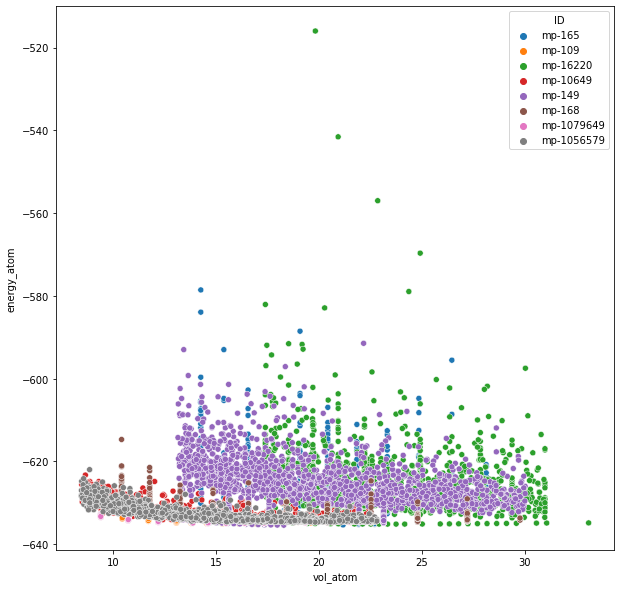

In [4]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
ax = fig.add_subplot(111)
sns.scatterplot(x=df['vol_atom'], y=df['energy_atom'], hue=df['ID'], ax=ax)

In [5]:
df['energy_atom'].min()

-635.407995844

In [6]:
# SCF - ZBL
from create_input.lmp.info_from_lmp_out import LammpsLogParser

In [7]:
result = []
for path2target in all_path:
    try:
        structure_id = list(filter(lambda x: 'mp-' in x, path2target.split('/')))[0]
        qelattice = get_qel(path2target)
        vol = qelattice.get_vol()
        energy = qelattice.get_energy()
        lmp_obj = LammpsLogParser(path2target=path2target, dump_filename='dump.out')
        lmp_energy = lmp_obj.get_energy()
        energy = energy - lmp_energy
        vol_atom = vol / qelattice.num_atom
        energy_atom = energy / qelattice.num_atom
        result.append([structure_id, vol, energy, vol_atom, energy_atom, path2target])
    except:
        print(path2target)
        continue

df_lmp = pd.DataFrame(data=result, columns=['ID', 'vol', 'energy', 'vol_atom', 'energy_atom', 'path'])

/Users/y1u0d2/desktop/Lab/data/qe_data/Si/mp-16220/h0l44m83PZTtPeS9w


<AxesSubplot:xlabel='vol_atom', ylabel='energy_atom'>

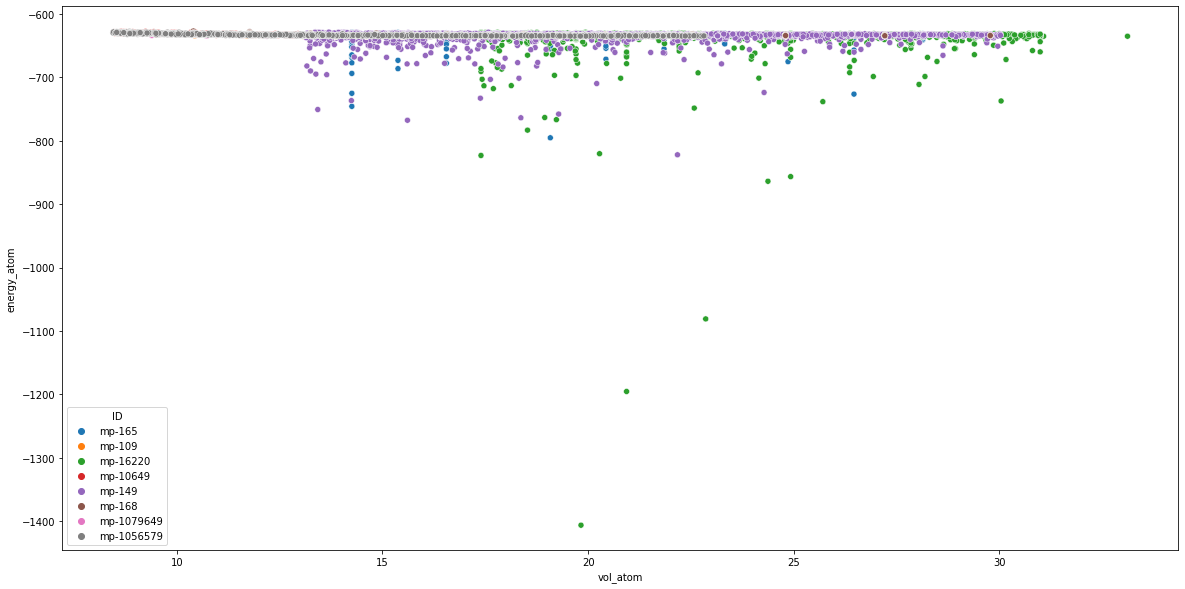

In [8]:
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')
ax = fig.add_subplot(111)

# ax.set_ylim(-650, -600)
sns.scatterplot(data=df_lmp, x='vol_atom', y='energy_atom', hue='ID', ax=ax)

<AxesSubplot:xlabel='vol_atom', ylabel='energy_atom'>

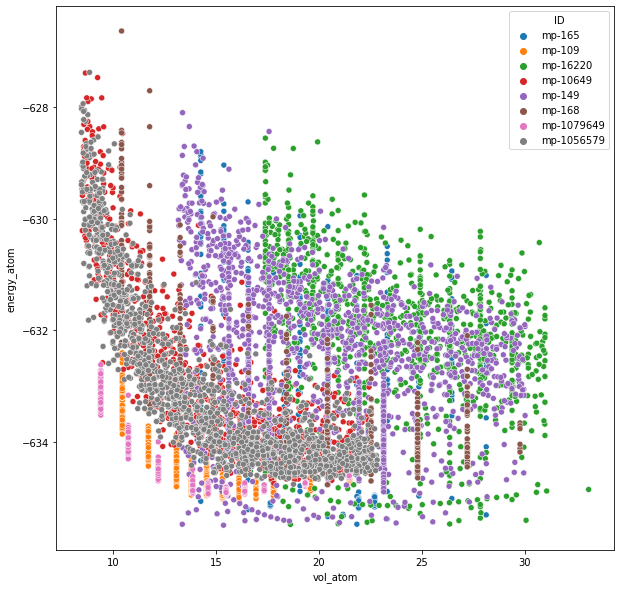

In [14]:
tmp = df_lmp.loc[df_lmp['energy_atom'] > -635.5]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

sns.scatterplot(data=tmp, x='vol_atom', y='energy_atom', hue='ID', ax=ax)

In [10]:
from constants.constants import get_all_structure_info

info = get_all_structure_info()
info

mpid          n_atom
mp-1056579    16        1350
mp-10649      16        1058
mp-1079649    8         1000
mp-109        8         1059
mp-149        8          595
              64        1377
mp-149_dimer  2           61
mp-16220      34        1326
mp-165        32         569
mp-168        8          471
All                     8866
dtype: int64

In [11]:
ids = df['ID'].unique()
ids = list(filter(lambda x: 'dimer' not in x, ids))

<AxesSubplot:xlabel='vol_atom', ylabel='energy_atom'>

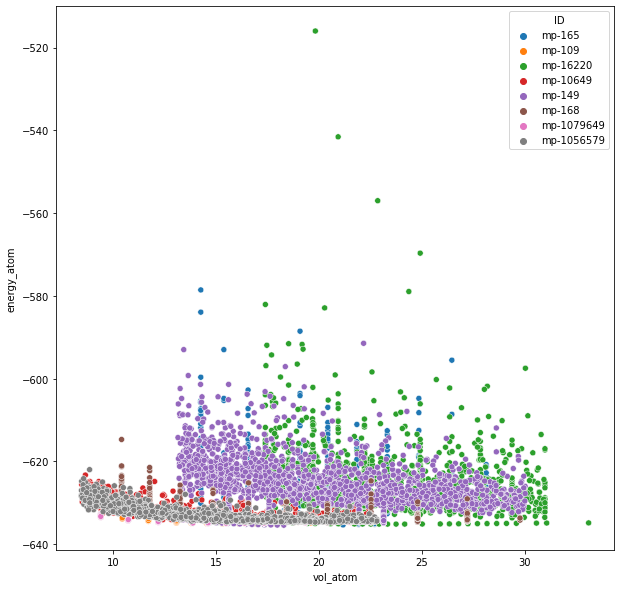

In [12]:
df_tmp = df.loc[df['ID'].isin(ids)]

fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
ax = fig.add_subplot(111)
sns.scatterplot(x=df_tmp['vol_atom'], y=df_tmp['energy_atom'], hue=df_tmp['ID'], ax=ax)

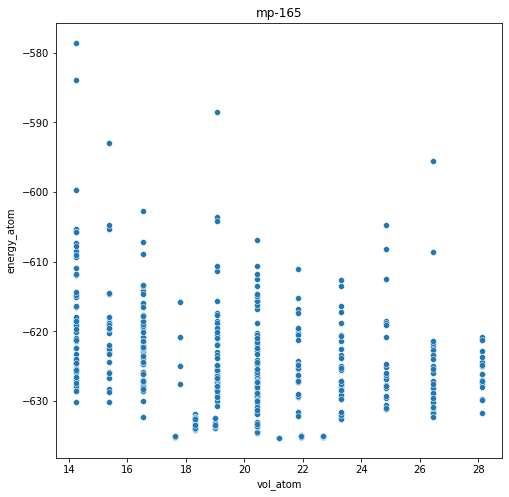

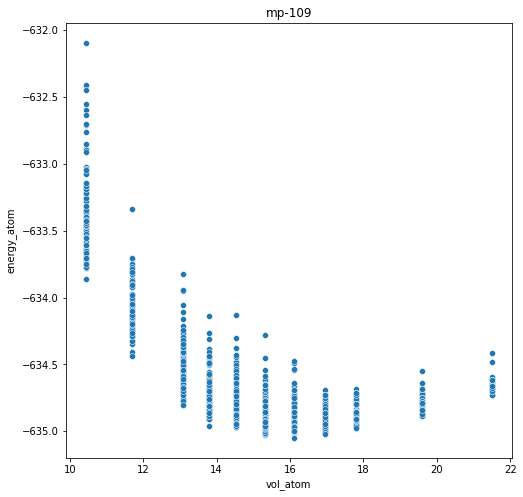

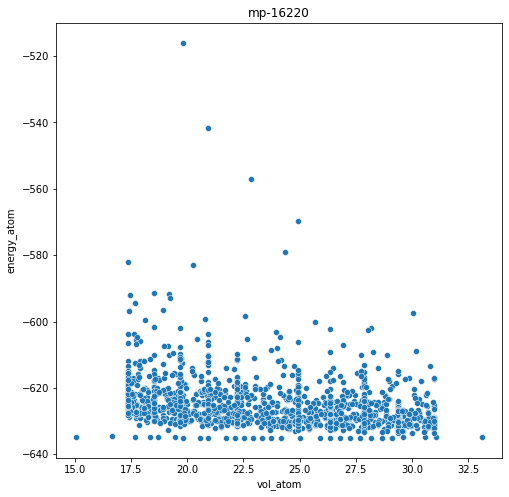

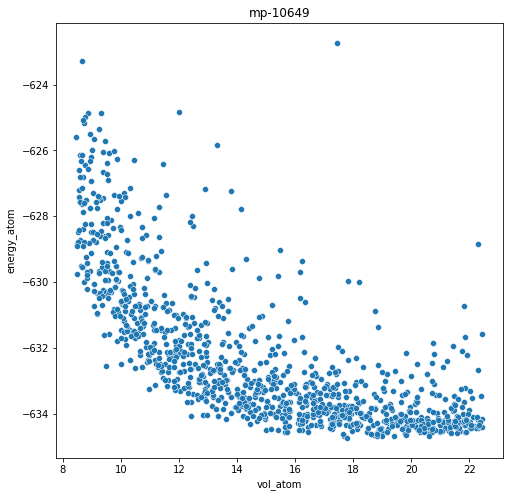

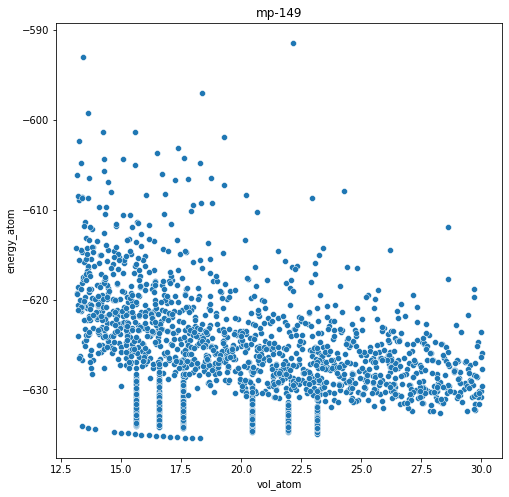

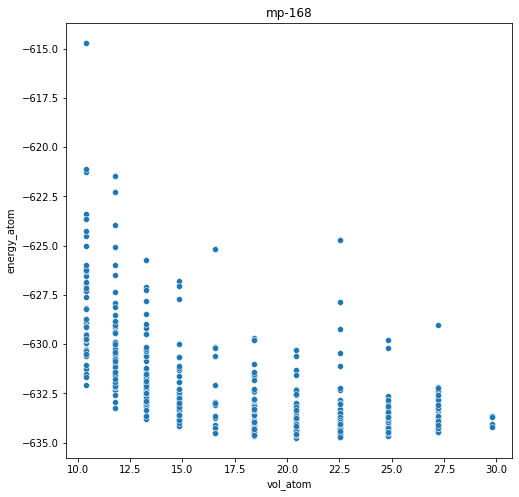

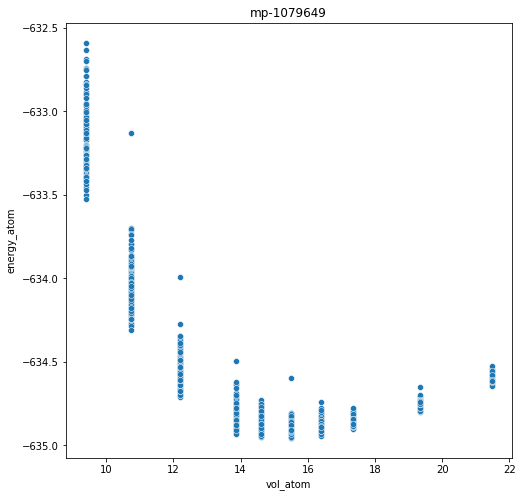

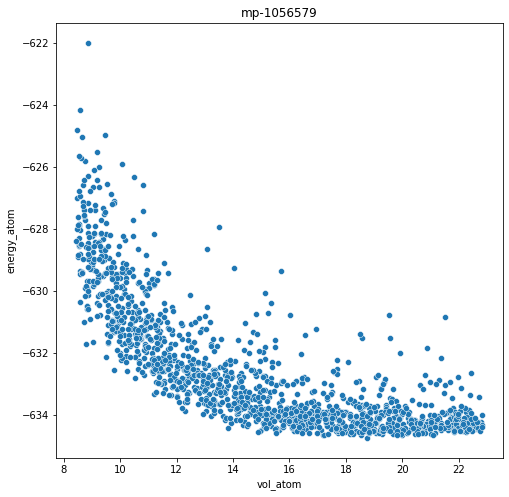

In [13]:
for mp_id in df['ID'].unique():
    df_each = df.loc[df['ID'] == mp_id]
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.set_title(mp_id)
    sns.scatterplot(x=df_each['vol_atom'], y=df_each['energy_atom'], ax=ax)